In [13]:
import pandas as pd
pd.options.display.max_columns = None # 显示所有列

In [14]:
# Read .csv
data = pd.read_csv('data.csv')
data

,malignant,bilateral,age,month,bmi,diabetes,hypertension,surgery,smoking,family,menarche,menopause,miscarriage,pregnancy,childbearing,nd_blood,nd_milk,nd_serous,nd_change,nd_number,nd_mass,nd_position,nd_distance,nd_shape,nd_surface,nd_dispersion,nd_quantity,nd_distribution,nd_retraction,nd_appearance,us_ductectasia,us_intramass,us_cysmass,us_mass,us_size,us_position,us_distance,us_shape,us_boundary,us_bloodflow,us_calcification,us_birads,xray
0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,0,0,0
1,1,1,1,1,1,0,1,1,0,0,1,0,2,2,1,0,0,1,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,0,0,0
2,1,0,2,0,2,0,0,0,1,0,1,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,0,1,0
3,1,0,1,1,2,0,0,0,0,0,1,0,1,2,1,1,0,0,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,2,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,2,1,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,4,1,1,1,2,1,1,0,0,1,1,2,2,3,4,1,1,2,1,0,1,0
351,0,1,1,0,2,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,2,1,1,2,1,0,1,0
352,0,1,1,0,2,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,2,2,1,1,2,1,1,0,0,0,0,1,2,2,1,1,1,1,1,0,0,0
353,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,1,1,1,1,1,2,1,1,0,0,1,2,0,2,1,5,1,1,1,1,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   malignant         355 non-null    int64
 1   bilateral         355 non-null    int64
 2   age               355 non-null    int64
 3   month             355 non-null    int64
 4   bmi               355 non-null    int64
 5   diabetes          355 non-null    int64
 6   hypertension      355 non-null    int64
 7   surgery           355 non-null    int64
 8   smoking           355 non-null    int64
 9   family            355 non-null    int64
 10  menarche          355 non-null    int64
 11  menopause         355 non-null    int64
 12  miscarriage       355 non-null    int64
 13  pregnancy         355 non-null    int64
 14  childbearing      355 non-null    int64
 15  nd_blood          355 non-null    int64
 16  nd_milk           355 non-null    int64
 17  nd_serous         355 non-null    i

In [16]:
from pycaret.clustering import *
clusterdata = setup(data, session_id=42)


Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Original Data,"(355, 43)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,43
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(355, 116)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [17]:
kmeans = create_model('kmeans', num_clusters = 4)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [18]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,malignant,bilateral,age,month,bmi,diabetes,hypertension,surgery,smoking,family,...,us_size,us_position,us_distance,us_shape,us_boundary,us_bloodflow,us_calcification,us_birads,xray,Cluster
0,1,0,0,1,2,0,0,0,0,0,...,3,2,1,2,1,1,0,0,0,Cluster 3
1,1,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,0,0,Cluster 2
2,1,0,2,0,2,0,0,0,1,0,...,3,1,1,2,2,2,0,1,0,Cluster 1
3,1,0,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cluster 0
4,1,0,2,0,2,1,1,0,0,0,...,1,5,1,1,1,1,0,1,0,Cluster 3


In [24]:
plot_model(kmeans)

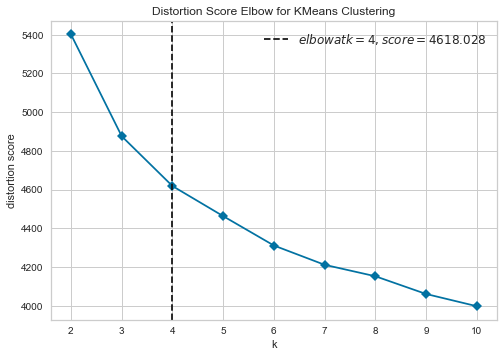

In [20]:
plot_model(kmeans, plot = 'elbow')

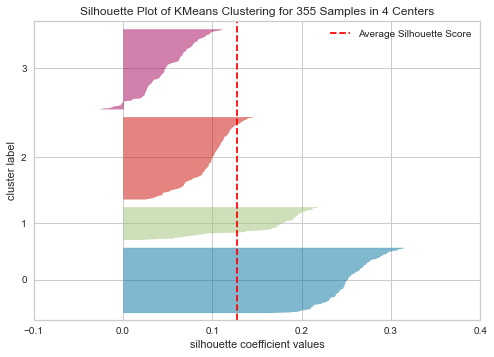

In [21]:
plot_model(kmeans, plot = 'silhouette')

In [22]:
plot_model(kmeans, plot = 'distribution')

In [23]:
plot_model(kmeans, plot = 'distribution', feature = 'malignant')